In [29]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Paso 2: Cargar el dataset 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = [
 "NumEmbarazos", "Glucosa", "PresionSanguinea", "GrosorPiel",
 "Insulina", "IMC", "HistorialDiabetes", "Edad", "TieneDiabetes"
]
data = pd.read_csv(url, names=columnas)


Primeros registros:
   NumEmbarazos  Glucosa  PresionSanguinea  GrosorPiel  Insulina   IMC  \
0             6      148                72          35         0  33.6   
1             1       85                66          29         0  26.6   
2             8      183                64           0         0  23.3   
3             1       89                66          23        94  28.1   
4             0      137                40          35       168  43.1   

   HistorialDiabetes  Edad  TieneDiabetes  
0              0.627    50              1  
1              0.351    31              0  
2              0.672    32              1  
3              0.167    21              0  
4              2.288    33              1  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NumEmbarazos       768 non-null 

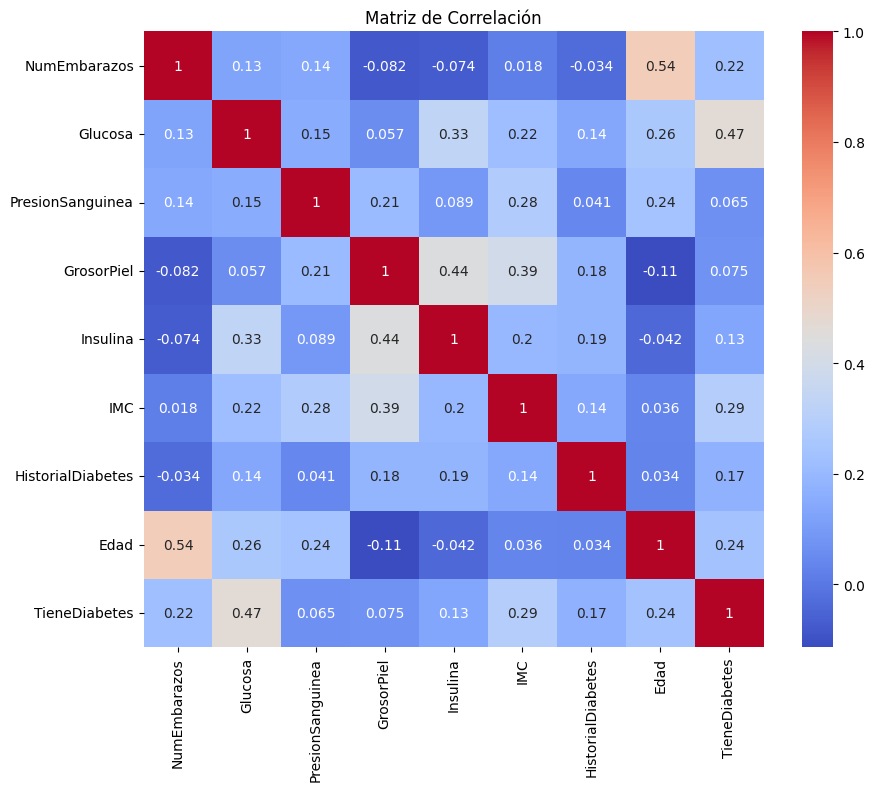

In [31]:
# Paso 3: Análisis
print("Primeros registros:")
print(data.head())

print("\nInformación general del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [32]:
# Paso 4: Preprocesamiento
columnas_invalidas = ["Glucosa", "PresionSanguinea", "GrosorPiel", "Insulina", "IMC"]
for col in columnas_invalidas:
 data[col] = data[col].replace(0, np.nan)
 data[col].fillna(data[col].mean(), inplace=True)

# Escalar los datos
X = data.drop("TieneDiabetes", axis=1)
y = data["TieneDiabetes"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\josem\AppData\Local\Temp\ipykernel_8584\975488280.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [33]:
# Paso 5: División en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [34]:
# Paso 6: Entrenar varios modelos

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [35]:
# Paso 7: Evaluación de modelos
def evaluar_modelo(nombre, y_true, y_pred):
 print(f"\n🔎 Resultados para {nombre}:")
 print("Accuracy:", accuracy_score(y_true, y_pred))
 print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
 print("Reporte de clasificación:\n", classification_report(y_true, y_pred))

evaluar_modelo("Logistic Regression", y_test, log_pred)
evaluar_modelo("Random Forest", y_test, rf_pred)
evaluar_modelo("KNN", y_test, knn_pred)


🔎 Resultados para Logistic Regression:
Accuracy: 0.7291666666666666
Matriz de confusión:
 [[99 24]
 [28 41]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192


🔎 Resultados para Random Forest:
Accuracy: 0.75
Matriz de confusión:
 [[96 27]
 [21 48]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       123
           1       0.64      0.70      0.67        69

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.76      0.75      0.75       192


🔎 Resultados para KNN:
Accuracy: 0.7083333333333334
Matriz de confusión:
 [[89 34]
 [22 47]

In [ ]:
# Paso 8: Hacer una predicción nueva
# Para hacer la nueva predicción sólo habría que introducir los valores de: "NumEmbarazos", "Glucosa", "PresionSanguinea", "GrosorPiel", "Insulina", "IMC", "HistorialDiabetes", "Edad" (en dicho orden). Como en este ejemplo:
nueva_persona = np.array([[1, 130, 80, 25, 100, 30.5, 0.5, 35]]) # Datos simulados
nueva_persona_scaled = scaler.transform(nueva_persona)
prediccion = rf_model.predict(nueva_persona_scaled)
print("\n🎯 Predicción para nueva persona:", "Tiene diabetes" if prediccion[0] == 1 else "No tiene diabetes")


🎯 Predicción para nueva persona: Tiene diabetes


C:\Users\josem\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
